## pytorch는 신경망을 생성하고 학습시키는 것을 도와주기 위해서 torch.nn, torch,optim, Dataset, DataLoader와 같은 잘 디자인된 모듈과 클래스를 제공한다.


### 이 성능을 최대한 활용하고 우리의 문제에 맞게 커스터마이즈하기 위해서, 정확히 이들이 어떤 작업을 수행하는지 알아야 함


In [1]:
from pathlib import Path
import requests

DATA_PATH= Path("./")
PATH = DATA_PATH/"mnist"

PATH.mkdir(parents=True, exist_ok = True)
URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [2]:
# 이 데이터셋은 numpy 배열 포맷이고, 데이터를 직렬화하기 위한 python 전용 포맷 pickle을 이용하여 저장되어 있음

import pickle 
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")


(50000, 784)


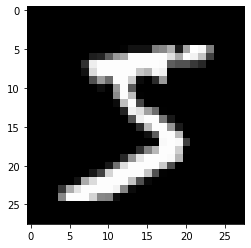

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape((28,28)), cmap = "gray")
print(x_train.shape)

In [21]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train,y_train, x_valid, y_valid))

n, c = x_train.shape
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


/tmp/ipykernel_16605/3525070524.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train,y_train, x_valid, y_valid))


In [23]:
import math 

weights = torch.randn(784,10)/math.sqrt(784)

#pytorch에서 _ 다음에 오는 메서드 이름은 연산이 인플레이스로 수행되는 것을 의미함
weights.requires_grad_()
bias = torch.zeros(10,requires_grad =True)



In [24]:
# 활성화 함수 
def log_softmax(x):
    return x-x.exp().sum(-1).log().unsqueeze(-1)

# python에서 @는 dot product (점곱, 내적) 연산을 나타냄
def model(xb):
    return log_softmax(xb @ weights+bias)

In [27]:
bs =64
xb =x_train[0:bs] # 미니 배치 추출
preds = model(xb)
print(preds[0], preds.shape)

tensor([-2.8588, -1.6181, -2.7130, -1.9461, -2.0034, -2.7931, -2.4860, -2.2690,
        -2.5925, -2.5558], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [ ]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()
loss_func = nll
